# Baysesian comparators: simulation of BRAID-based similarity calculations with only one word in the dictionary (abc)

This document outlines the simulation of a simplified version of a Lexical Decision (DL) task implemented in the BRAID model :
* using a dictionary containing only one word,
* using a pre-defined letter percept (P) as a sigmoïd.
The primary goal of this simulation is to compare different DL versions, i.e. different similarity evaluations.
The comparison encompasses DL versions with Inner similarity, Cosine similarity or Projection similarity.
    * Inner similarity: In this scenario, the similarity is a simple inner product.
    * Cosine similarity: Here, the similarity is a cosine similarity, i.e. divided by the norm of the 2 probability distributions
    * Projection similarity: Here, the similarity is a projection, i.e. divided by the norm of only 1 probability distribution (the letter percept P)

In [30]:
import sys
sys.path.append("../")
sys.path.append("../../braidpy/")
import  matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import numpy as np
plt.style.use("default")
import scipy.linalg as LA

######################################
###### P definition ###
######################################

# distribution on P : dim 1 = position, dim2 = probability distribution on this letter position

# starts with a uniform distribution
pInitBraid = lambda : [[1/26]*26]*3
# uniform distribution on a smaller space
pInit = lambda : [[1/4]*4]*3

def augmSig(factor,i,p):
    """ sigmoïd progression with growth "factor" of 1 letter from the percept p which corresponds to index i"""
    p=[factor if j==i else (1-factor)/(len(p)-1) for j in range(len(p))]
    return p

def varPOk(pP,t):
    """ 1 good word : abc """
    pP[0]=augmSig(sig[t],0,pP[0])
    pP[1]=augmSig(sig[t],1,pP[1])
    pP[2]=augmSig(sig[t],2,pP[2])
    return pP

####################################################################################
###### Letter distribution on letters from the only word in the dictionary ########
###################################################################################

# word = abc, 3-letter alphabet
eps=0.09
a=[1-eps if i==0 else eps/3 for i in range(4)]
b=[1-eps if i==1 else eps/3 for i in range(4)]
c=[1-eps if i==2 else eps/3 for i in range(4)]
d=[1-eps if i==3 else eps/3 for i in range(4)]
pL0=[a,b,c]
pL1=[a,b,a]
pL2=[c,a,b]
pL3=[b,c,a]
w = [pL0,pL1,pL2,pL3]

def lambda_calculation(pL,title):
    """ lambda-pattern calculation """
    pP=pInit()
    yesP=[]; pPlot=[]
    yes=[]; yesPL=[]
    plt.style.use("default")
    for t in range(n):
        pP=varPOk(pP,t)
        val0 =np.prod([np.dot(i,j) for i,j in zip(pP,pL)])
        valP =val0/np.prod([LA.norm(i) for i in pP])
        valPL =valP/np.prod([LA.norm(i) for i in pL])
        yes.append(val0)
        yesP.append(valP)
        yesPL.append(valPL)
        pPlot.append(pP[0][0])
    def plot_sim(ax,i,y,n,title=""):
        fyes, = ax[i].plot(range(len(y)),y,'b')
        fno, = ax[i].plot(range(len(n)),n,'r')
        ax[i].set_xlabel("time step",fontsize=22)
        ax[i].set_title(title,fontsize=27)
        ax[i].set_ylim([-0.05,1.05])
    fig ,axs = plt.subplots(1,3,figsize=(15,5))
    plot_sim(axs,0,yes,1-np.array(yes),"$P_{inner}$")
    plot_sim(axs,1,yesPL,1-np.array(yesPL),"$P_{cos}$")
    plot_sim(axs,2,yesP,1-np.array(yesP),"$P_{proj}$")
    plt.savefig(title),
    plt.show()
    plt.title("P peak value")
    plt.plot(range(n),pPlot)
    plt.show()


# 1. Similarity during Word Recognition of a real word

* Only $P_{cos}$ reaches the 1 asymptote expected for a real word.
* Classic division is really unstable (begins near 0)

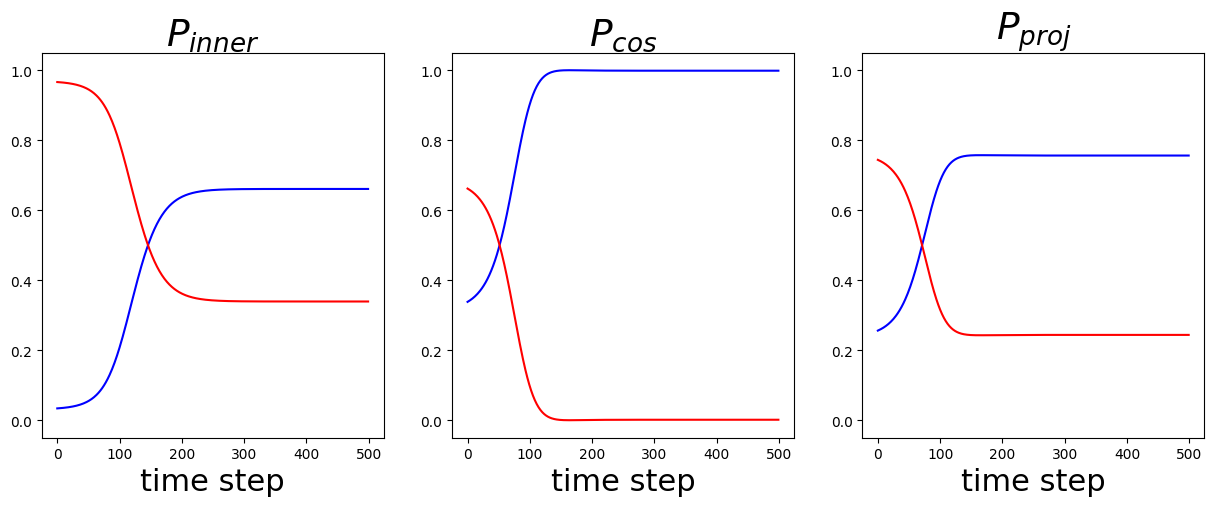

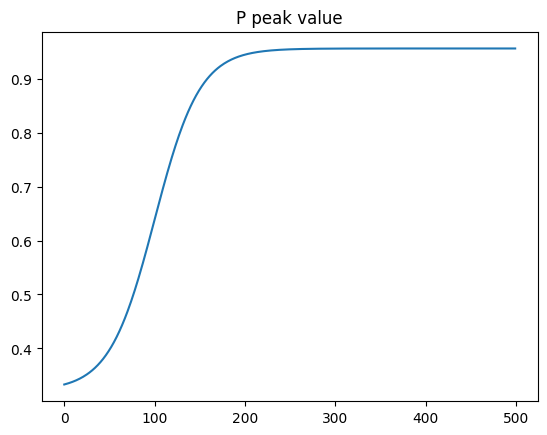

In [31]:
lambda_calculation(pL0,'atomic_dl_yes.png')


# 2. Similarity during Word Recognition with an error: peak at the wrong place

* $P_{inner}$ almost at 0 from the beginning
* $P_{cos}$'s and $P_{proj}$'s yes value first increase, then decrease (like expected)
* They both "wait more" to take a decision.

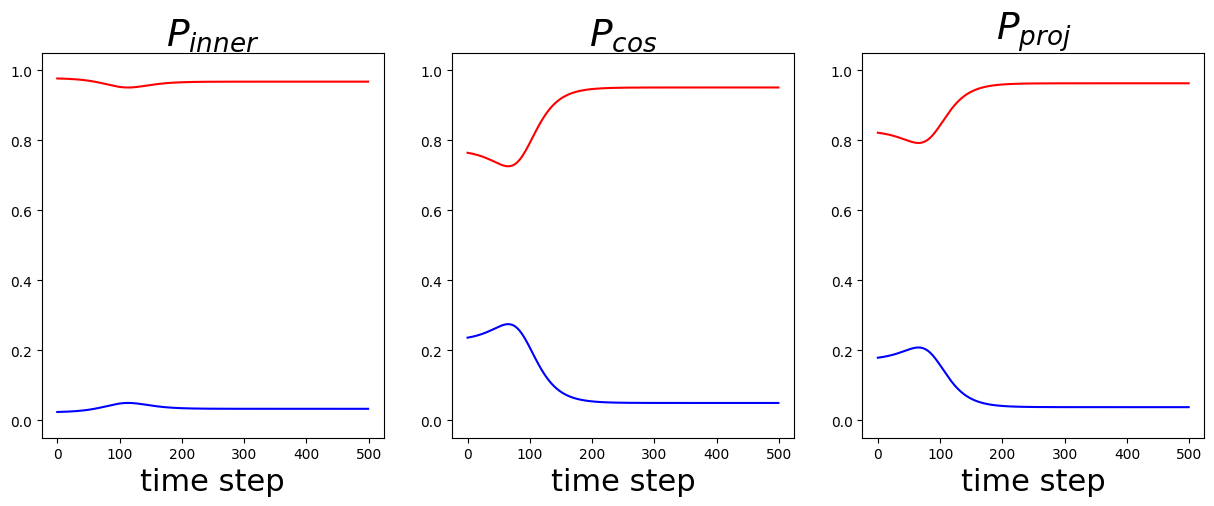

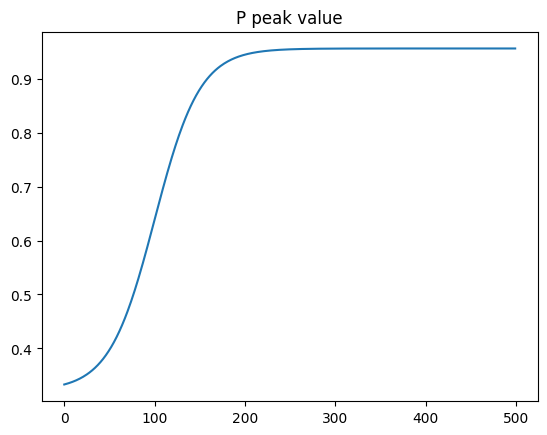

In [32]:
lambda_calculation(pL1,'atomic_dl_no.png')


# 6. Conclusion

* $P_{cos}$ seems to have the better detection, with good asymptote values at the end.
* $P_{proj}$ also good, because the detection goes in the right direction, even if the 1 asymptote is not reached for words.
* $P_{inner}$ is not suited for our similarity calculation, it's worse than the 2 others at the end, and unstable at the beginning.